# Задача 23. Плохая обусловленность метода Кардано
## Выполнил: Ванюшкин Д.И
### Метод Кардано (общее представление):
Ещё со времён 7-го класса нас учили решать квадратные уравнения общего вида, 
мы находили корни данного уравнения по готовой формуле или же заверяли, что таковых нет.
А слышали ли Вы из курса школьной программы, что-то про формулу Кардано для решения кубических уравнений общего вида?
Ответом на этот вопрос будет скорее всего "нет". Так вот, оказывается, что существует формула, позволяющая найти корни
даже такого сложного на первый взгяд уравнения.

Рассмотрим кубическое уравнение $y^3 + ay^2 + by + c = 0$ В этом уравнении все коэффициенты и неизвестная $y$ - комплексные числа
После замены $ y = x - \frac{a}{3} $ в уравнении третьей степени (см. выше) исчезает член с квадратом неизвестной $y$. Уравнение примет вид:
$$ x^3 + px + q = 0 $$
Его можно найти в виде:
$$ x = \alpha + \beta $$
Где числа $\alpha$ и $\beta$ - комплексные числа:
   $$ \alpha = \sqrt[3]{-\frac{q}{2} + \sqrt{\frac{q^2}{4} + \frac{p^3}{27}}},   \beta = \sqrt[3]{-\frac{q}{2} - \sqrt{\frac{q^2}{4} + \frac{p^3}{27}}}$$
Среди всевозможных комбинаций $\alpha, \beta$, получаемых при подстановке всех значений корней кубических, необходимо выбрать лишь те, которые удовлетворяют условию $3\alpha\beta + p = 0$.
Легко видеть, что если $\alpha \neq 0$ и $\beta \neq 0$, то таким образом будет получено $3$ решения: для каждого из трех значений $\alpha$ можно определить единственное $\beta$.

#### Задача:
Реализовать метод Кардано для нахождения корней кубического уравнения $y^3 + ay^2 + by + c = 0$. 
Функция поиска корней: `y1, y2, y3 = cardano(a,b,c)` должна работать как для уравнений с вещественными, так и комплексными коэффициентами.
Необходимо использовать вышеописанный метод для нахождения вещественного корня следующего уравнения:

$$
y^3 +3y^2 +\lambda^2y+3\lambda^2 = 0
$$

при различных $\lambda$.
Исследуйте потерю точности из-за ошибок округления при больших $\lambda$
(в частности, для $\lambda$ порядка величины, обратной машинному эпсилон).

Сравните результаты с теми, которые получаются методом Брента `scipy.optimize.brentq` и методом Ньютона `scipy.optimize.newton`.

### Поиск корней общего уравнения 3-ий степени
#### Методы поиска корней взяты из этого источника: https://ru.wikipedia.org/wiki/Формула_Кардано

Любое кубическое уравнение общего вида
$$\displaystyle ax^{3}+bx^{2}+cx+d=0$$
При помощи замены переменной $\displaystyle x=y-{\frac {b}{3a}}$ может быть приведено к следующей канонической форме
$$ \displaystyle y^{3}+py+q=0 $$
где $p$ и $q$ - числа, соответственно равные:
$$ \displaystyle p={\frac {3ac-b^{2}}{3a^{2}}}$$, 
$$\displaystyle q={\frac {2b^{3}-9abc+27a^{2}d}{27a^{3}}}. $$

$\displaystyle Q=\left({\frac {p}{3}}\right)^{3}+\left({\frac {q}{2}}\right)^{2}$ - дискриминант, от знака которого зависит количество комплексных/вещественных корней

Если $D > 0$ - имеем 2 комплексных корня и 1 действительный корень
Если $D <= 0$ - все корни действительные

Корни уравнения будут иметь следующий вид:

$$x_1 = \alpha + \beta - \frac{b}{3a}$$
$$x_2 = -\frac{\alpha + \beta}{2} + i\frac{\alpha - \beta}{2}\sqrt{3} - \frac{b}{3a}$$
$$x_3 = -\frac{\alpha + \beta}{2} - i\frac{\alpha - \beta}{2}\sqrt{3} - \frac{b}{3a}$$

где

$$\displaystyle \alpha ={\sqrt[{3}]{-{\frac {q}{2}}+{\sqrt {Q}}}},$$
$$\displaystyle \beta ={\sqrt[{3}]{-{\frac {q}{2}}-{\sqrt {Q}}}},$$

##### Напишем функцию, занимающуюся поиском корней приведённого кубического уравнения по 3-м коэффициентам:


In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

from scipy.special import cbrt

In [2]:
def cardano(a, b, c, d):
    
    p = (3*a*c - b**2)/(3 * a**2)
    q = (2*b**3 - 9*a*b*c + 27 * a**2 * d)/(27 * a**3)
    
    Q = (p/3)**3 + (q/2)**2
    
    #Используем sqrt из numpy, дабы можно было получить результат в качестве комплексного числа, если вдруг подкоренное выражение меньше нуля
    
    alpha = cbrt(-q/2 + np.sqrt(Q))
    beta = cbrt(-q/2 - np.sqrt(Q))
    
    x1 = (alpha + beta) - b/(3*a)
    
    if Q > 0:
        part = 1/2j * (alpha - beta) * np.sqrt(3)
    else:
        part = 1/2 * (alpha - beta) * np.sqrt(3)
    
    x2 = -(alpha + beta) / 2 + part - b/(3*a)
    x3 = -(alpha + beta) / 2 - part - b/(3*a)

    return x1, x2, x3
    

##### Для проверочки, решим кубическое уравнение такого вида:
$$ x^3 + x^2 + x + 1 = 0$$
В котором один из корней очевиден и это $x_1$ = -1
    

In [3]:
cardano(1, 1, 1, 1)

(-1.0,
 (5.551115123125783e-17-0.9999999999999999j),
 (5.551115123125783e-17+0.9999999999999999j))

##### Переходим ко второй части задания, реализуем функцию, зависящую от двух неизвестных:
$$f(x, \lambda) = x^3 +3x^2 +\lambda^2x+3\lambda^2$$



In [4]:
def f(x, l):
    return x**3 + 3 * x**2 + l**2 * x + 3 * l**2

Удобно будет в дальнейшем создать функцию при необходимости получения числа машинной минимальной разницы между двумя числами с плавающей запятой (машинный эпсилон):

In [5]:
def eps():
    return sys.float_info.epsilon
    

#### Построим график, показывающий то, какое отклонение возникает при использовании очень малых чисел
    

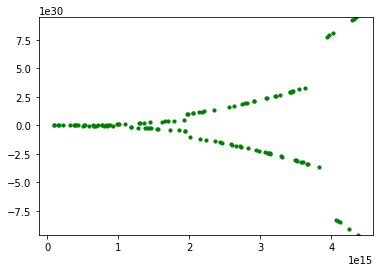

minY = -9.580141844849942e+30
maxY = 9.461991174249836e+30


In [6]:
minY = 0
maxY = 0
values = np.linspace(0, 1.0 / eps(), 500) # Диапазон перебираемых чисел (от самого маленького положительного до 500)
for x in values:
    
    #Используем 1-ый корень из уравнения
    y = f(cardano(1, 3, x**2, 3*x**2)[0], x)
    
    if y != 0:
        maxY = max(maxY, y)
        minY = min(minY, y)
        plt.scatter(x, y, c = 'green', s = 10)
        
#Устанавлиаем верхние и нижние пределы для графика
plt.ylim(bottom = minY, top = maxY)

plt.show()

print('minY =', minY)
print('maxY =', maxY)
    

Для удобства сравнения, мы получили максимальное и минимально значения функции отклонения, из этих показателей, как и их графика в целом, становится ясно, что погрешность весомая
#### Сравним нашу реализацию метода Кардано, метод Ньютона и метод Брента

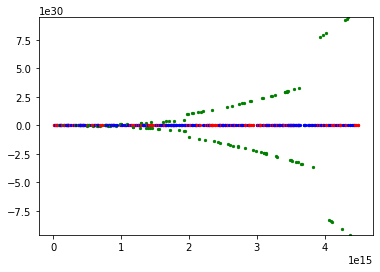

In [8]:
maxY = 0
minY = 0

values = np.linspace(0, 1.0 / eps(), 500)

for x in values: 
    lmbd = lambda l : f(l, x)

    yCardano = f(cardano(1, 3, x**2, 3*x**2)[0], x)
    yNewton = f(opt.newton(lmbd, 0), x)
    yBrentq = f(opt.brentq(lmbd, -1000, 1000), x)
    
    if yNewton != 0:
        maxY = max(maxY, yNewton)
        minY = min(minY, yNewton)

        plt.scatter(x, yNewton, c = 'red', s = 5)
        
    if yCardano != 0:
        maxY = max(maxY, yCardano)
        minY = min(minY, yCardano)
        
        plt.scatter(x, yCardano, c = 'green', s = 5)
        
        
    if yBrentq != 0:
        maxY = max(maxY, yBrentq)
        minY = min(minY, yBrentq)

        plt.scatter(x, yBrentq, c = 'blue', s = 5)
        
        
plt.ylim(bottom = minY, top = maxY)
plt.show()

## Заключение:

По последнему графику видно, что метод Кардано уступает методу Ньютона и Брента. Так происходит потому, что формула Кардано даёт погрешности при увеличении параментров. Следовательно, стоит ли пользоваться этим методом? Скорее всего нет, не стоит